In [ ]:
import pandas as pd

In [ ]:
df_train = pd.read_csv('tested.csv')
df_train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,0,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,1,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,0,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,1,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,0,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


In [ ]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [ ]:
df_train.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,86
SibSp,0
Parch,0
Ticket,0
Fare,1


In [ ]:
df_train.drop(['Cabin'], axis=1, inplace=True)

In [ ]:
df_train['Embarked'].value_counts()

,count
Embarked,
S,270
C,102
Q,46


In [ ]:
embarked = {"Embarked" : {"S": 0, "C": 1, "Q": 2}}
df_train.replace(embarked, inplace=True)

<ipython-input-9-1a6eee2738ef>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_train.replace(embarked, inplace=True)


In [ ]:
df_train.dropna(inplace=True, how = 'any')

In [ ]:
df_train['Fare'] = df_train['Fare'].astype(int)
df_train['Age'] = df_train['Age'].astype(int)

In [ ]:
df_train = df_train.drop(['PassengerId', 'Name', 'Ticket'], axis=1)

In [ ]:
sex = {"Sex" : {"male" : 0, "female" : 1}}
df_train.replace(sex, inplace=True)

<ipython-input-13-d8f7ddb7eb17>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_train.replace(sex, inplace=True)


In [ ]:
df_train.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,34,0,0,7,2
1,1,3,1,47,1,0,7,0
2,0,2,0,62,0,0,9,2
3,0,3,0,27,0,0,8,0
4,1,3,1,22,1,1,12,0
5,0,3,0,14,0,0,9,0
6,1,3,1,30,0,0,7,2
7,0,2,0,26,1,1,29,0
8,1,3,1,18,0,0,7,1
9,0,3,0,21,2,0,24,0


In [ ]:
import sklearn.model_selection as ms
feature = df_train[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]
label = df_train['Survived']
X_train, X_test, y_train, y_test = ms.train_test_split(feature, label, test_size=0.25, random_state=0)

In [ ]:
import sklearn.naive_bayes as nb
import sklearn.metrics as mt
gnb = nb.GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

In [ ]:
y_prediksi = gnb.predict(X_test)
accuracy = mt.accuracy_score(y_test, y_prediksi)
precision = mt.precision_score(y_test, y_prediksi)
print('accuracy :', accuracy, 'precision :', precision)

accuracy : 1.0 precision : 1.0


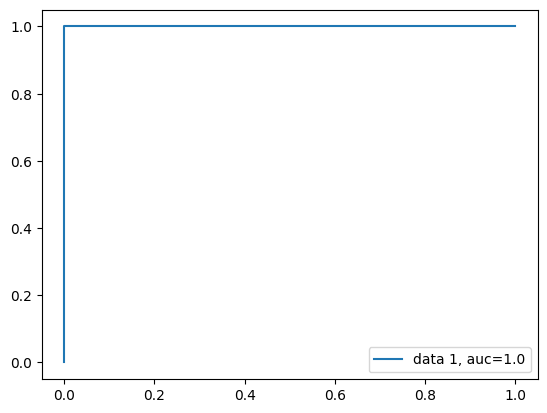

In [ ]:
import matplotlib.pyplot as plt
y_pred_proba = gnb.predict_proba(X_test)[::,1]
fp, tp, _ = mt.roc_curve(y_test,  y_pred_proba)
auc = mt.roc_auc_score(y_test, y_pred_proba)
plt.plot(fp, tp, label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()